In [1]:
import pandas as pd
import geopandas as gpd
import os
import numpy as np

In [2]:
parent_folder = 'Data'
file_name = 'Colegios2020.xlsx'

path = os.path.join(parent_folder, file_name)
schools = pd.read_excel(path)


In [7]:
schools = schools[(schools['Comuna'] != 'ISLA DE PASCUA') & (schools['Comuna'] != 'JUAN FERNANDEZ')]
schools.rename(columns={'Unnamed: 0':'indice'}, inplace=True)
file_name = 'Colegios(Continental)2020.xlsx'
path = os.path.join(parent_folder, file_name)
schools.to_excel(path, index=False)

In [5]:
crs = 'EPSG:4326'
geometry = gpd.points_from_xy(schools['Longitud'], schools['Latitud'], crs=crs)

geo_schools = gpd.GeoDataFrame(schools.drop(columns=['Latitud', 'Longitud']), geometry=geometry, crs=crs)


<Axes: >

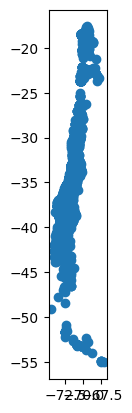

In [8]:
geo_schools.plot()

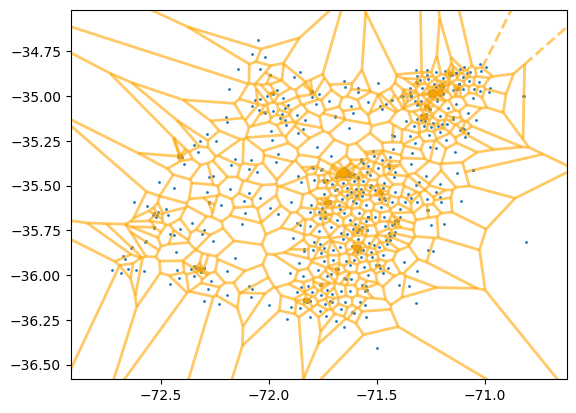

In [10]:
from scipy.spatial import Voronoi, voronoi_plot_2d
import matplotlib.pyplot as plt


test = geo_schools[geo_schools['Region'] == 7]

points = test['geometry'].apply(lambda x: [x.x, x.y]).to_list()
vor = Voronoi(points)

fig = voronoi_plot_2d(vor, figsize=(10,100), show_vertices=False, line_colors='orange', line_width=2, line_alpha=0.6, point_size=2)
plt.show()

In [11]:
from shapely.geometry import Polygon

polygons = []
for region in vor.regions:
    polygon = Polygon(vor.vertices[region])
    polygons.append(polygon)

voronoi = gpd.GeoDataFrame(geometry=polygons, crs=crs)
voronoi

,geometry
0,"POLYGON ((-71.85826 -34.67430, -72.03625 -34.7..."
1,"POLYGON ((-71.23514 -35.79275, -71.21575 -35.7..."
2,"POLYGON ((-71.36831 -36.00477, -71.38476 -36.1..."
3,"POLYGON ((-71.36831 -36.00477, -71.37907 -35.9..."
4,"POLYGON ((-72.71368 -35.92415, -73.15067 -35.6..."
...,...
764,"POLYGON ((-71.66030 -35.42687, -71.66129 -35.4..."
765,"POLYGON ((-71.66129 -35.42588, -71.66212 -35.4..."
766,"POLYGON ((-71.65826 -35.42707, -71.65819 -35.4..."
767,"POLYGON ((-71.66030 -35.42687, -71.66143 -35.4..."
